In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [266]:
df=pd.read_csv("travel.csv")
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,03/11/2014 16:02,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,13/03/2013 19:25,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,13/10/2014 13:20,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,05/11/2013 10:40,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,10/06/2014 13:34,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [267]:
df=df.drop(columns='Unnamed: 0',axis=1)
print ("Rows, Columns    : " , df.shape)
print ("\nVariables : " ,df.columns.tolist())

Rows, Columns    :  (100000, 24)

Variables :  ['date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63915 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99878 non-null   object 
 12  srch_co                    99878 non-null   object 
 13  srch_adults_cnt            100

In [269]:
df.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [270]:
df.duplicated().sum()

0

In [271]:
df.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

<Axes: >

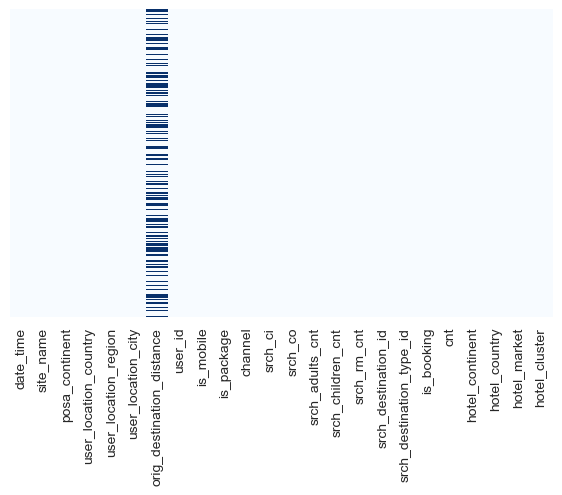

In [272]:
fig, ax=plt.subplots(figsize=(7,4))
sns.heatmap(df.isna(), cmap="Blues", cbar=False, yticklabels=False)

([<matplotlib.axis.XTick at 0x20fe1811050>,
 [Text(0, 0, 'Not booking'), Text(1, 0, 'Booking')])

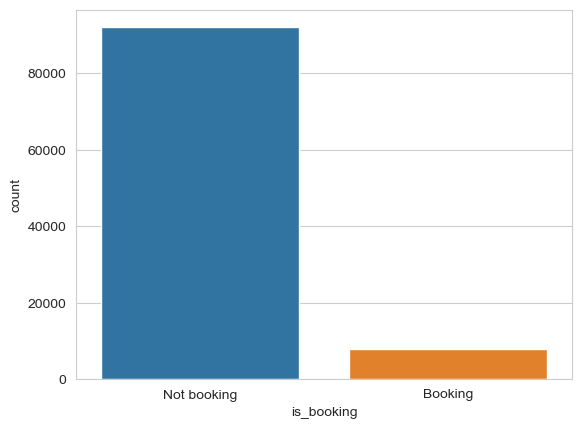

In [273]:
sns.countplot(data=df, x=df['is_booking'])
plt.xticks([0, 1], ['Not booking', 'Booking'])

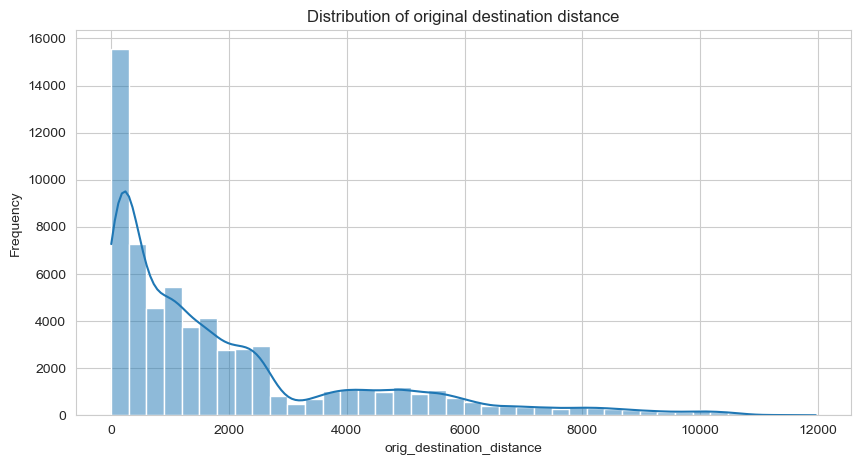

In [274]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='orig_destination_distance', bins=40, kde=True)
plt.title('Distribution of original destination distance')
plt.ylabel('Frequency')
plt.show()

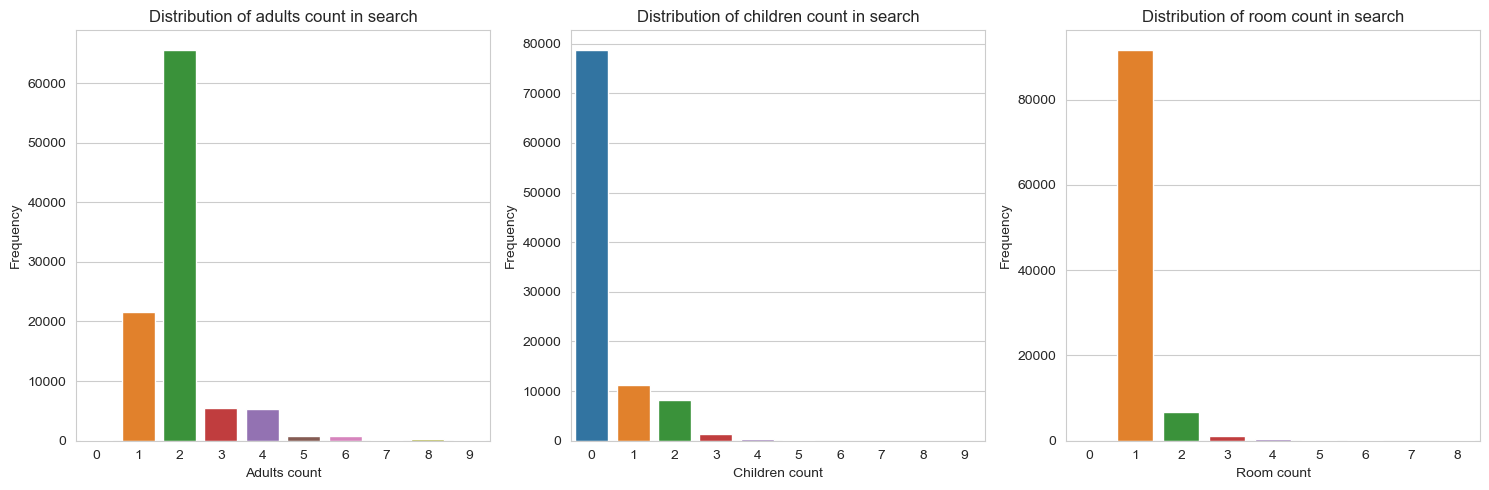

In [275]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of 'srch_adults_cnt'
sns.countplot(ax=axes[0], data=df, x='srch_adults_cnt')
axes[0].set_title('Distribution of adults count in search')
axes[0].set_xlabel('Adults count')
axes[0].set_ylabel('Frequency')

# Distribution of 'srch_children_cnt'
sns.countplot(ax=axes[1], data=df, x='srch_children_cnt')
axes[1].set_title('Distribution of children count in search')
axes[1].set_xlabel('Children count')
axes[1].set_ylabel('Frequency')

# Distribution of 'srch_rm_cnt'
sns.countplot(ax=axes[2], data=df, x='srch_rm_cnt')
axes[2].set_title('Distribution of room count in search')
axes[2].set_xlabel('Room count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

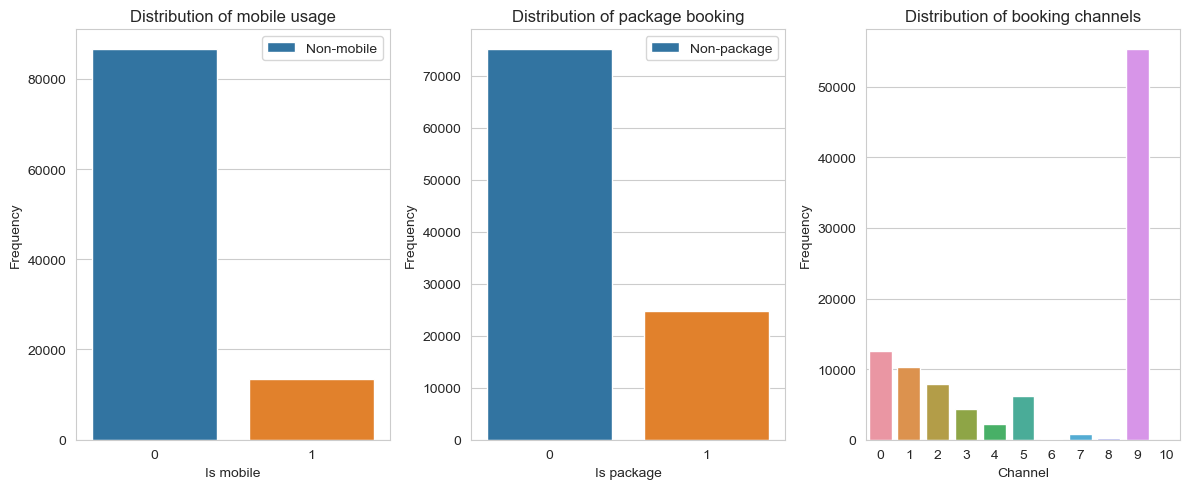

In [276]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Distribution of 'is_mobile'
sns.countplot(ax=axes[0], x='is_mobile', data=df)
axes[0].set_title('Distribution of mobile usage')
axes[0].set_xlabel('Is mobile')
axes[0].set_ylabel('Frequency')
axes[0].legend(labels=['Non-mobile', 'Mobile device'])

# Distribution of 'is_package'
sns.countplot(ax=axes[1], x='is_package', data=df)
axes[1].set_title('Distribution of package booking')
axes[1].set_xlabel('Is package')
axes[1].set_ylabel('Frequency')
axes[1].legend(labels=['Non-package', 'package'])

# Distribution of 'channel'
sns.countplot(ax=axes[2], x='channel', data=df)
axes[2].set_title('Distribution of booking channels')
axes[2].set_xlabel('Channel')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [277]:
df.dropna(subset=['srch_ci', 'srch_co'],inplace=True)
df.isnull().sum()/len(df)*100

date_time                     0.000000
site_name                     0.000000
posa_continent                0.000000
user_location_country         0.000000
user_location_region          0.000000
user_location_city            0.000000
orig_destination_distance    36.077014
user_id                       0.000000
is_mobile                     0.000000
is_package                    0.000000
channel                       0.000000
srch_ci                       0.000000
srch_co                       0.000000
srch_adults_cnt               0.000000
srch_children_cnt             0.000000
srch_rm_cnt                   0.000000
srch_destination_id           0.000000
srch_destination_type_id      0.000000
is_booking                    0.000000
cnt                           0.000000
hotel_continent               0.000000
hotel_country                 0.000000
hotel_market                  0.000000
hotel_cluster                 0.000000
dtype: float64

In [278]:
df['srch_ci'] = pd.to_datetime(df['srch_ci'],dayfirst=True)
df['srch_co'] = pd.to_datetime(df['srch_co'],dayfirst=True)
df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M')
df['date_time'] = pd.to_datetime(df['date_time'].apply(lambda x: x.date()))
df

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-11-03,24,2,77,871,36643,456.1151,792280,0,1,...,0,1,8286,1,0,1,0,63,1258,68
1,2013-03-13,11,3,205,135,38749,232.4737,961995,0,0,...,0,1,1842,3,0,1,2,198,786,37
2,2014-10-13,2,3,66,314,48562,4468.2720,495669,0,1,...,0,1,8746,1,0,1,6,105,29,22
3,2013-11-05,11,3,205,411,52752,171.6021,106611,0,0,...,0,1,6210,3,1,1,2,198,1234,42
4,2014-06-10,2,3,66,174,50644,NaN,596177,0,0,...,1,1,12812,5,0,1,2,50,368,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-03-31,2,3,66,351,21609,1386.4061,858268,0,0,...,0,1,762,6,0,1,2,50,503,91
99996,2013-09-29,2,3,66,462,49272,698.1395,957708,0,0,...,0,1,12843,5,0,1,2,50,661,6
99997,2014-07-11,37,1,69,998,52849,NaN,814512,1,1,...,0,3,18773,1,0,1,6,22,1794,38
99998,2013-07-02,2,3,66,246,28491,207.2549,881704,0,1,...,0,1,8859,1,0,1,2,50,212,89


duration: number of duration of stay
days_in_advance: number of days between the booking and checkin date
Cin_day: Check-in day
Cin_month: Check-in month
Cin_year: Check-in year

In [279]:
def duration(row):
    #Gives the duration of trip and finding the time (in days) beween checkin and checkout.
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    return delta
def days_in_advance(row):
    #Gives the days the trip was booked in advance.
    delta = (row['srch_ci'] - row['date_time'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta 
    
df['duration'] = df.apply(duration, axis=1)
df['days_in_advance'] = df.apply(days_in_advance, axis=1)

In [280]:
df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)
df

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,duration,days_in_advance,Cin_day,Cin_month,Cin_year
0,2014-11-03,24,2,77,871,36643,456.1151,792280,0,1,...,1,0,63,1258,68,4.0,42.0,15,12,2014
1,2013-03-13,11,3,205,135,38749,232.4737,961995,0,0,...,1,2,198,786,37,1.0,0.0,13,3,2013
2,2014-10-13,2,3,66,314,48562,4468.2720,495669,0,1,...,1,6,105,29,22,7.0,172.0,3,4,2015
3,2013-11-05,11,3,205,411,52752,171.6021,106611,0,0,...,1,2,198,1234,42,1.0,2.0,7,11,2013
4,2014-06-10,2,3,66,174,50644,NaN,596177,0,0,...,1,2,50,368,83,5.0,54.0,3,8,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-03-31,2,3,66,351,21609,1386.4061,858268,0,0,...,1,2,50,503,91,4.0,97.0,6,7,2013
99996,2013-09-29,2,3,66,462,49272,698.1395,957708,0,0,...,1,2,50,661,6,1.0,1.0,30,9,2013
99997,2014-07-11,37,1,69,998,52849,NaN,814512,1,1,...,1,6,22,1794,38,7.0,98.0,17,10,2014
99998,2013-07-02,2,3,66,246,28491,207.2549,881704,0,1,...,1,2,50,212,89,2.0,11.0,13,7,2013


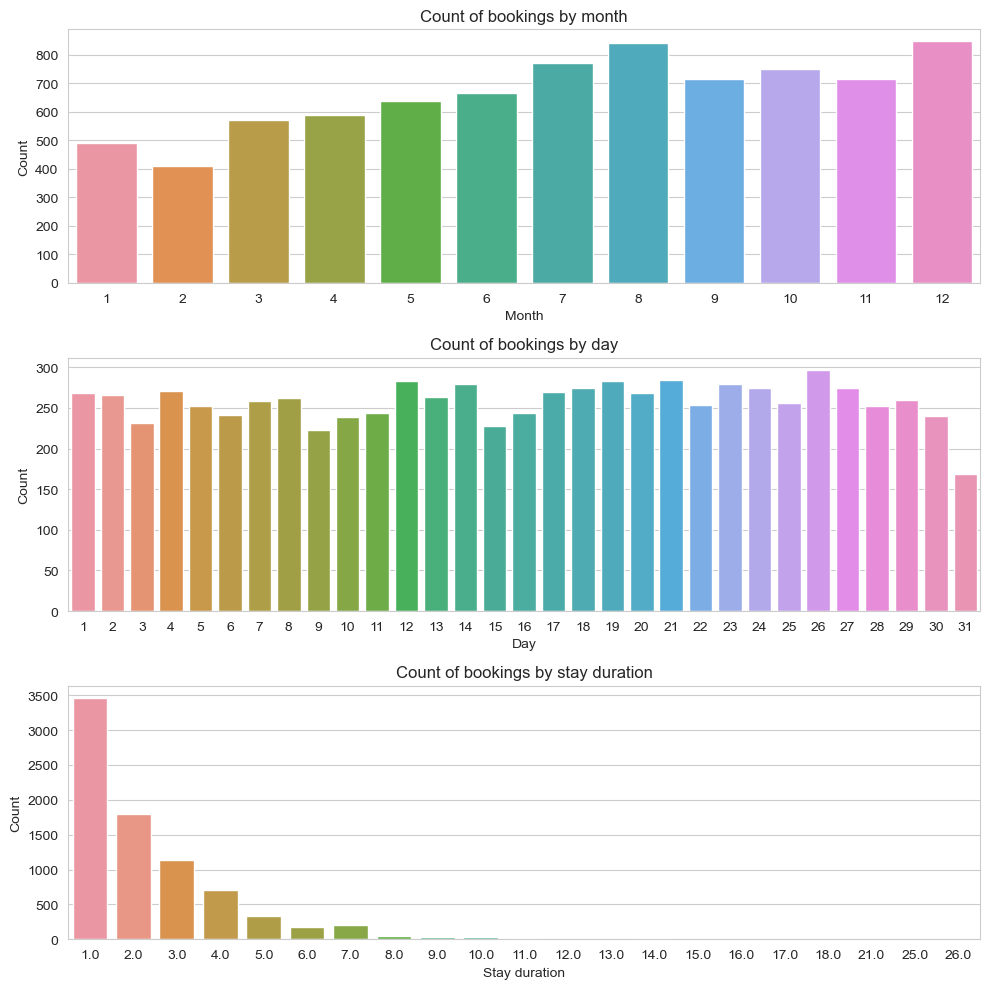

In [281]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Count the bookings in each month
sns.countplot(ax=axes[0], x='Cin_month', data=df[df["is_booking"] == 1], order=list(range(1, 13)))
axes[0].set_title('Count of bookings by month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Count the bookings as per the day
sns.countplot(ax=axes[1], x='Cin_day', data=df[df["is_booking"] == 1], order=list(range(1, 32)))
axes[1].set_title('Count of bookings by day')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

# Count the bookings as per the stay_duration
sns.countplot(ax=axes[2], x='duration', data=df[df["is_booking"] == 1])
axes[2].set_title('Count of bookings by stay duration')
axes[2].set_xlabel('Stay duration')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Before handle outlier')

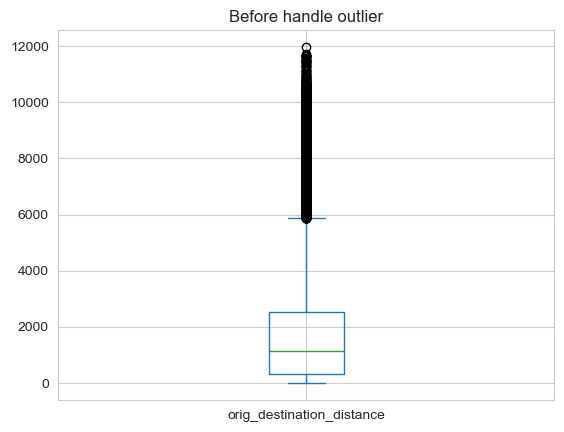

In [282]:
#Handle outlier
df['orig_destination_distance'].plot.box() 
plt.title('Before handle outlier')

Text(0.5, 1.0, 'After handle outlier')

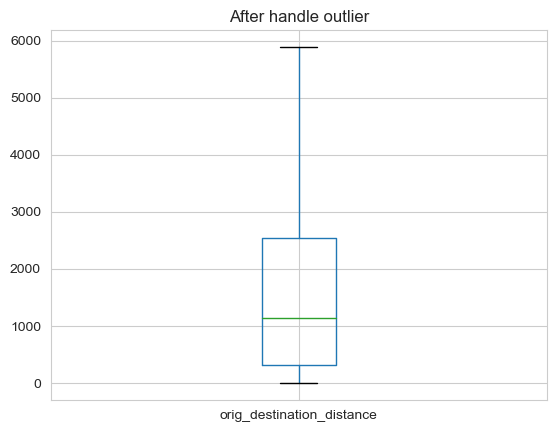

In [283]:
from sklearn.base import BaseEstimator, TransformerMixin
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def custom_init(self):
        self.lower_bound = None
        self.upper_bound = None
    
    def fit(self, data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_bound = Q1 - 1.5 * IQR
        self.upper_bound = Q3 + 1.5 * IQR
        return self
    
    def transform(self, data):
        return data.clip(self.lower_bound, self.upper_bound)
clipped_orig_destination_distance = BoxplotOutlierClipper().fit_transform(df["orig_destination_distance"])
clipped_orig_destination_distance.to_frame().boxplot()
plt.title('After handle outlier')

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


In [285]:
#Handle missing values
#Impute missing values in 'orig_destination_distance' with the median
imputer = SimpleImputer(strategy='median')
df['orig_destination_distance'] = imputer.fit_transform(df[['orig_destination_distance']])
df.isnull().sum()

date_time                     0
site_name                     0
posa_continent                0
user_location_country         0
user_location_region          0
user_location_city            0
orig_destination_distance     0
user_id                       0
is_mobile                     0
is_package                    0
channel                       0
srch_ci                       0
srch_co                       0
srch_adults_cnt               0
srch_children_cnt             0
srch_rm_cnt                   0
srch_destination_id           0
srch_destination_type_id      0
is_booking                    0
cnt                           0
hotel_continent               0
hotel_country                 0
hotel_market                  0
hotel_cluster                 0
duration                      0
days_in_advance              25
Cin_day                       0
Cin_month                     0
Cin_year                      0
dtype: int64

In [286]:
df.dropna(subset=['days_in_advance'],inplace=True)
df.isnull().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
duration                     0
days_in_advance              0
Cin_day                      0
Cin_month                    0
Cin_year                     0
dtype: int64

In [287]:
df=df.drop(['date_time','srch_ci','srch_co','user_id', 'srch_destination_id', 'srch_destination_type_id'],axis=1)

In [288]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'is_booking' in numerical_cols:
    numerical_cols.remove('is_booking')
# Create a transformer for numerical columns
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols)
])

In [289]:
y = df['is_booking']
X = df.drop('is_booking', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99853 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site_name                  99853 non-null  int64  
 1   posa_continent             99853 non-null  int64  
 2   user_location_country      99853 non-null  int64  
 3   user_location_region       99853 non-null  int64  
 4   user_location_city         99853 non-null  int64  
 5   orig_destination_distance  99853 non-null  float64
 6   is_mobile                  99853 non-null  int64  
 7   is_package                 99853 non-null  int64  
 8   channel                    99853 non-null  int64  
 9   srch_adults_cnt            99853 non-null  int64  
 10  srch_children_cnt          99853 non-null  int64  
 11  srch_rm_cnt                99853 non-null  int64  
 12  cnt                        99853 non-null  int64  
 13  hotel_continent            99853 non-null  int64  


In [290]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_smote).value_counts())

is_booking
0    73477
1    73477
Name: count, dtype: int64


Accuracy: 0.9096690200791148
[[18083   302]
 [ 1502    84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18385
           1       0.22      0.05      0.09      1586

    accuracy                           0.91     19971
   macro avg       0.57      0.52      0.52     19971
weighted avg       0.87      0.91      0.88     19971


Text(0.5, 1.0, 'Confusion Matrix')

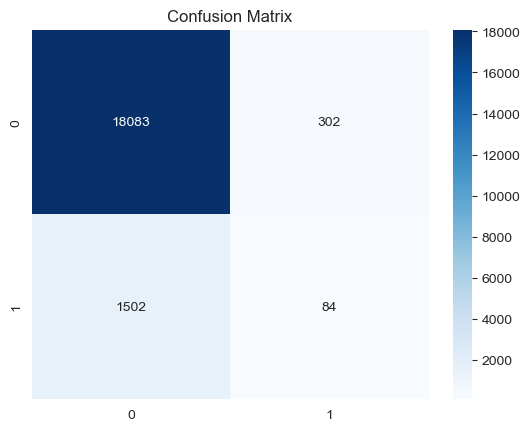

In [292]:
clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train_smote, y_train_smote)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(class_report)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')